In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Upload multiple CSV files
print("Please select your CSV files (you can select multiple files at once)")
uploaded = files.upload()

# Store dataframes in a dictionary
dataframes = {}

# Load each uploaded file
for filename in uploaded.keys():
    if filename.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        dataframes[filename] = df
        print(f"✓ Loaded: {filename} - Shape: {df.shape}")
    else:
        print(f"⚠ Skipped {filename} (not a CSV file)")

print(f"\nTotal CSV files loaded: {len(dataframes)}")

Please select your CSV files (you can select multiple files at once)


Saving ICE_BofA_High_Yield_Master_II_OAS.csv to ICE_BofA_High_Yield_Master_II_OAS.csv
Saving ICE_BofA_BBB_US_Corporate_Index_OAS.csv to ICE_BofA_BBB_US_Corporate_Index_OAS.csv
Saving Manufacturing_and_Trade_Inventory_and_Sales_Ratio.csv to Manufacturing_and_Trade_Inventory_and_Sales_Ratio.csv
Saving Delinquency_Rate_on_Credit_Card_Loan_All_Commercial Banks.csv to Delinquency_Rate_on_Credit_Card_Loan_All_Commercial Banks.csv
Saving 2_Years_Treasury_Rate_Yield.csv to 2_Years_Treasury_Rate_Yield.csv
Saving 20_Years_Treasury_Rate_Yield.csv to 20_Years_Treasury_Rate_Yield.csv
Saving MSCI_USA_LOW_VOL_INDEX_PERFROMANCE.csv to MSCI_USA_LOW_VOL_INDEX_PERFROMANCE.csv
Saving MSCI_USA_HIGH_DIV_YIELD_IDX_PER.csv to MSCI_USA_HIGH_DIV_YIELD_IDX_PER.csv
Saving SHILLER_CAPE_USEQUTIES.csv to SHILLER_CAPE_USEQUTIES.csv
Saving MSCI_USA_Momentum_Index_Performance.csv to MSCI_USA_Momentum_Index_Performance.csv
✓ Loaded: ICE_BofA_High_Yield_Master_II_OAS.csv - Shape: (350, 2)
✓ Loaded: ICE_BofA_BBB_US_Corpor

In [5]:
# Display basic information for each dataset
for filename, df in dataframes.items():
    print("="*80)
    print(f"FILE: {filename}")
    print("="*80)

    # Basic info
    print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"\nColumn Names and Types:")
    print(df.dtypes)

    # First few rows
    print(f"\nFirst 5 rows:")
    print(df.head(5))

    # Last few rows
    print(f"\nLast 5 rows:")
    print(df.tail(5))

    # Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\nMissing Values:")
        print(missing[missing > 0])
    else:
        print("\n✓ No missing values")

FILE: ICE_BofA_High_Yield_Master_II_OAS.csv

Shape: 350 rows × 2 columns

Column Names and Types:
observation_date     object
BAMLH0A0HYM2        float64
dtype: object

First 5 rows:
  observation_date  BAMLH0A0HYM2
0       1997-01-01          3.04
1       1997-02-01          2.73
2       1997-03-01          2.84
3       1997-04-01          2.94
4       1997-05-01          2.68

Last 5 rows:
    observation_date  BAMLH0A0HYM2
345       2025-10-01          2.94
346       2025-11-01          2.92
347       2025-12-01          2.81
348       2026-01-01          2.88
349       2026-02-01           NaN

Missing Values:
BAMLH0A0HYM2    1
dtype: int64
FILE: ICE_BofA_BBB_US_Corporate_Index_OAS.csv

Shape: 349 rows × 2 columns

Column Names and Types:
observation_date     object
BAMLC0A4CBBB        float64
dtype: object

First 5 rows:
  observation_date  BAMLC0A4CBBB
0       1997-01-01          0.82
1       1997-02-01          0.79
2       1997-03-01          0.76
3       1997-04-01          0.

In [6]:
# CONFIGURATION
use_auto_detect = True  # Automatically detects date and value columns

# For your files, this will use:
# - First column as X-axis (dates)
# - Second column (or last numeric column) as Y-axis (values)

print("Configuration set!")
print("Auto-detect mode: Enabled")

Configuration set!
Auto-detect mode: Enabled


In [7]:
# Helper function to parse dates
def prepare_dataframe(df):
    """Prepare dataframe by parsing dates and selecting appropriate columns"""
    # Try to parse first column as date
    first_col = df.columns[0]
    try:
        df[first_col] = pd.to_datetime(df[first_col])
        df = df.sort_values(first_col)
    except:
        pass

    # Get numeric columns for y-axis
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) >= 1:
        x_col = first_col
        y_col = numeric_cols[-1]  # Use last numeric column
        return df, x_col, y_col
    else:
        return df, None, None

# Test preparation
for filename, df in list(dataframes.items())[:2]:
    df_prep, x, y = prepare_dataframe(df.copy())
    print(f"{filename}: X={x}, Y={y}")

ICE_BofA_High_Yield_Master_II_OAS.csv: X=observation_date, Y=BAMLH0A0HYM2
ICE_BofA_BBB_US_Corporate_Index_OAS.csv: X=observation_date, Y=BAMLC0A4CBBB


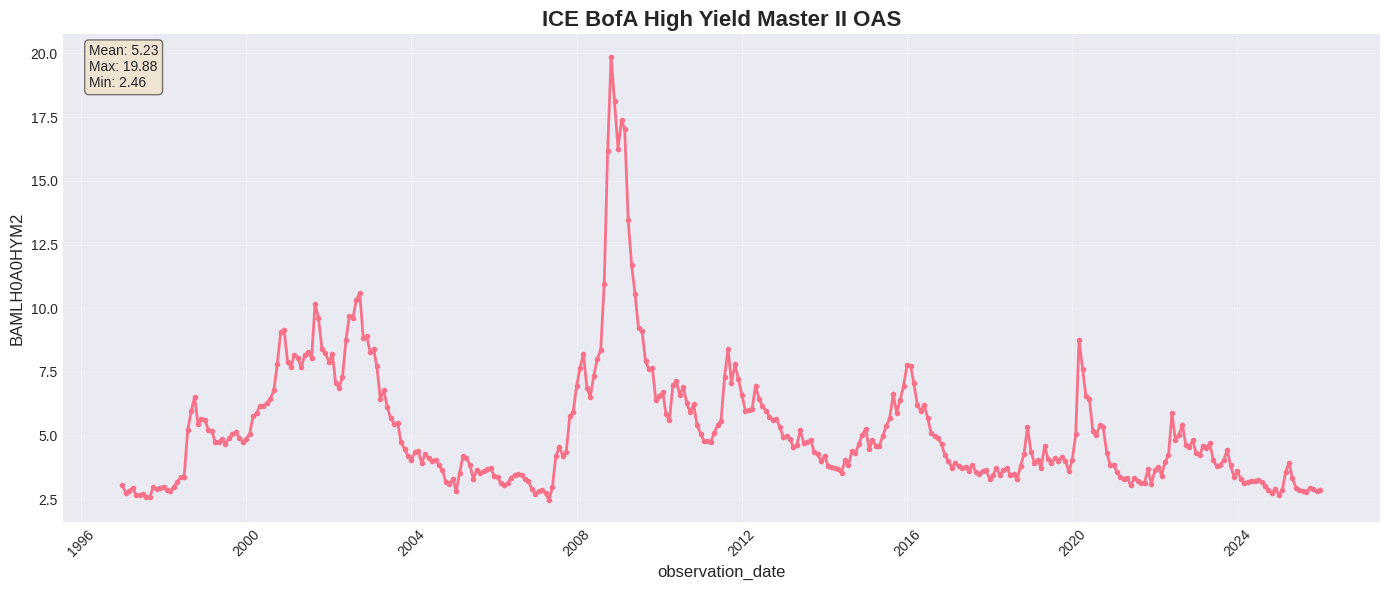

✓ Plot created for: ICE_BofA_High_Yield_Master_II_OAS.csv



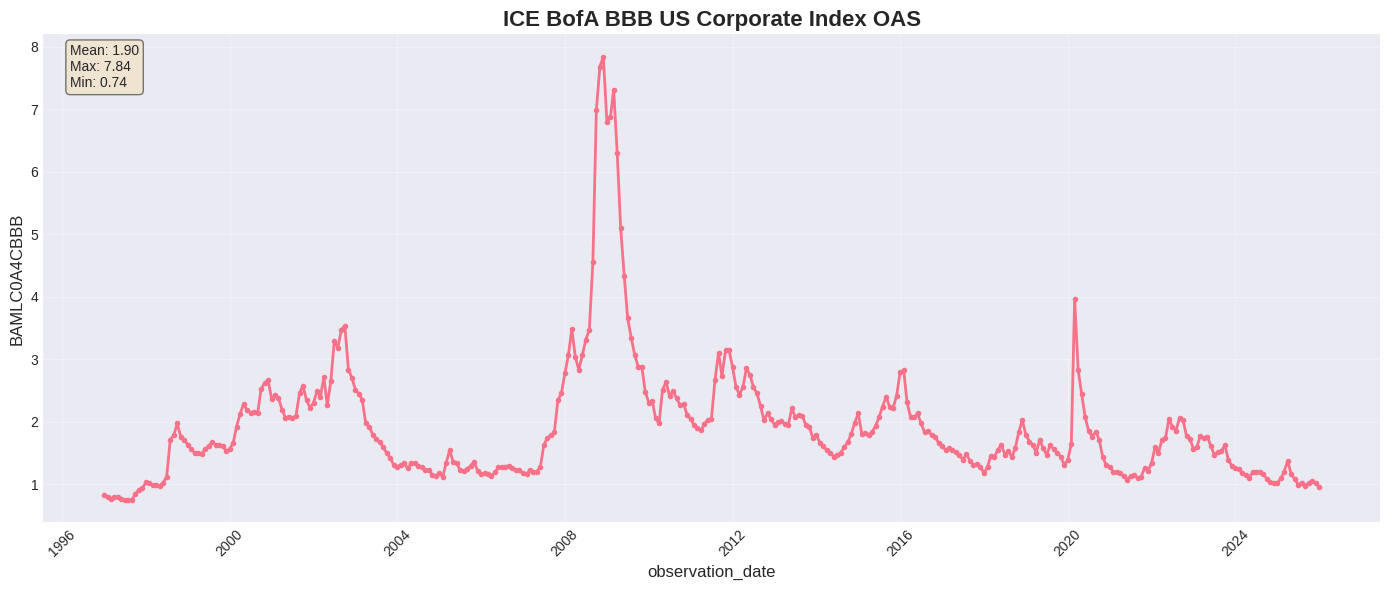

✓ Plot created for: ICE_BofA_BBB_US_Corporate_Index_OAS.csv



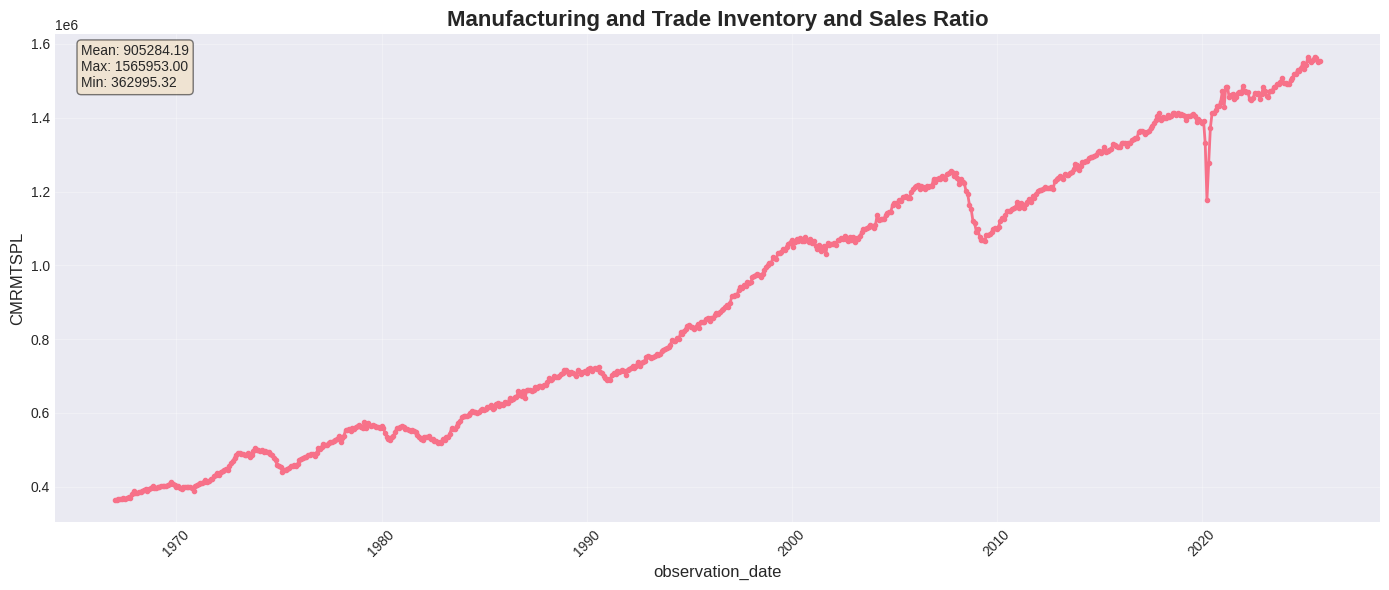

✓ Plot created for: Manufacturing_and_Trade_Inventory_and_Sales_Ratio.csv



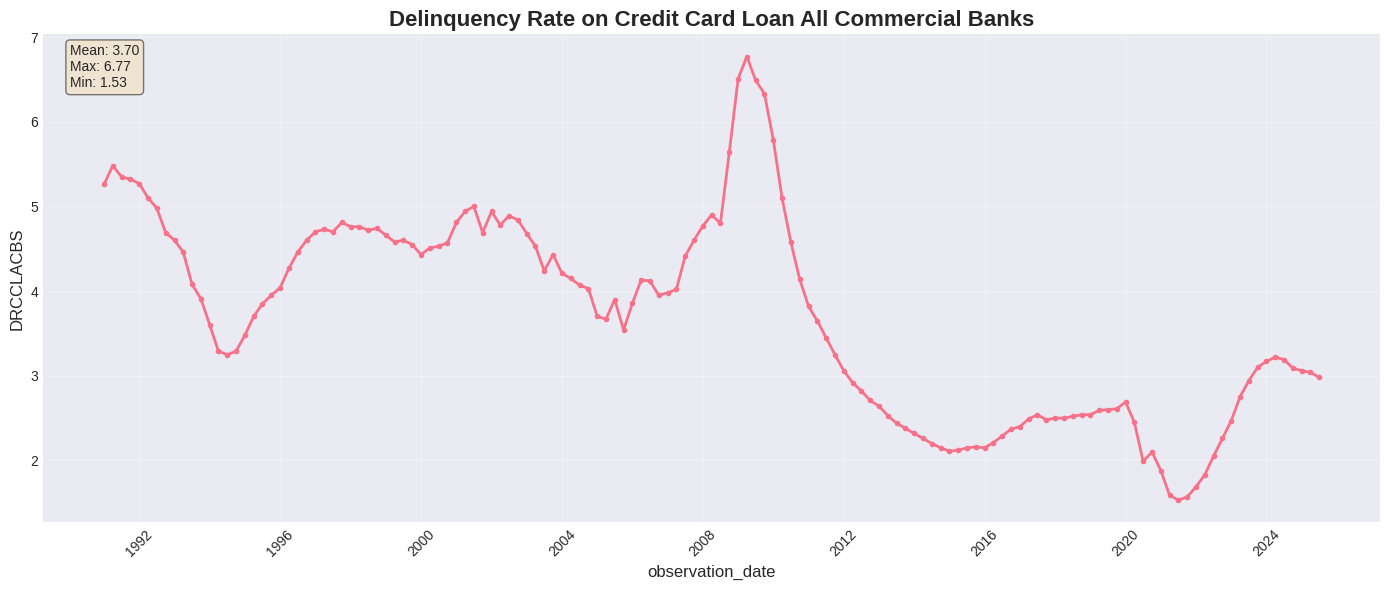

✓ Plot created for: Delinquency_Rate_on_Credit_Card_Loan_All_Commercial Banks.csv



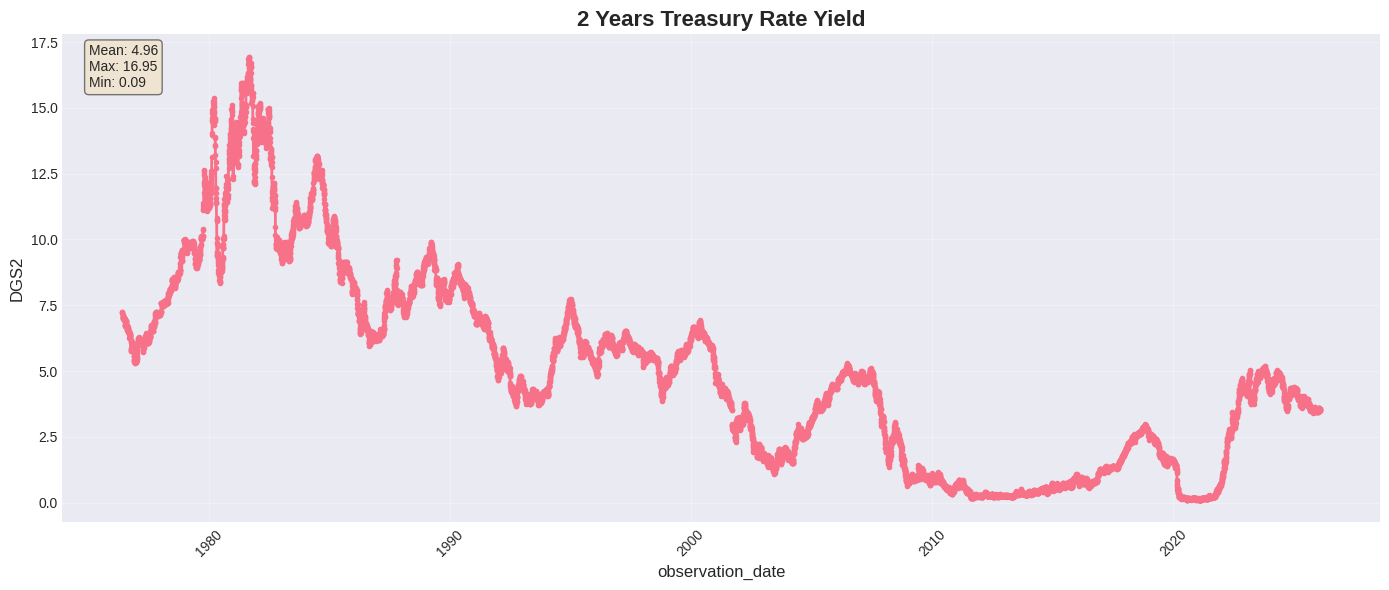

✓ Plot created for: 2_Years_Treasury_Rate_Yield.csv



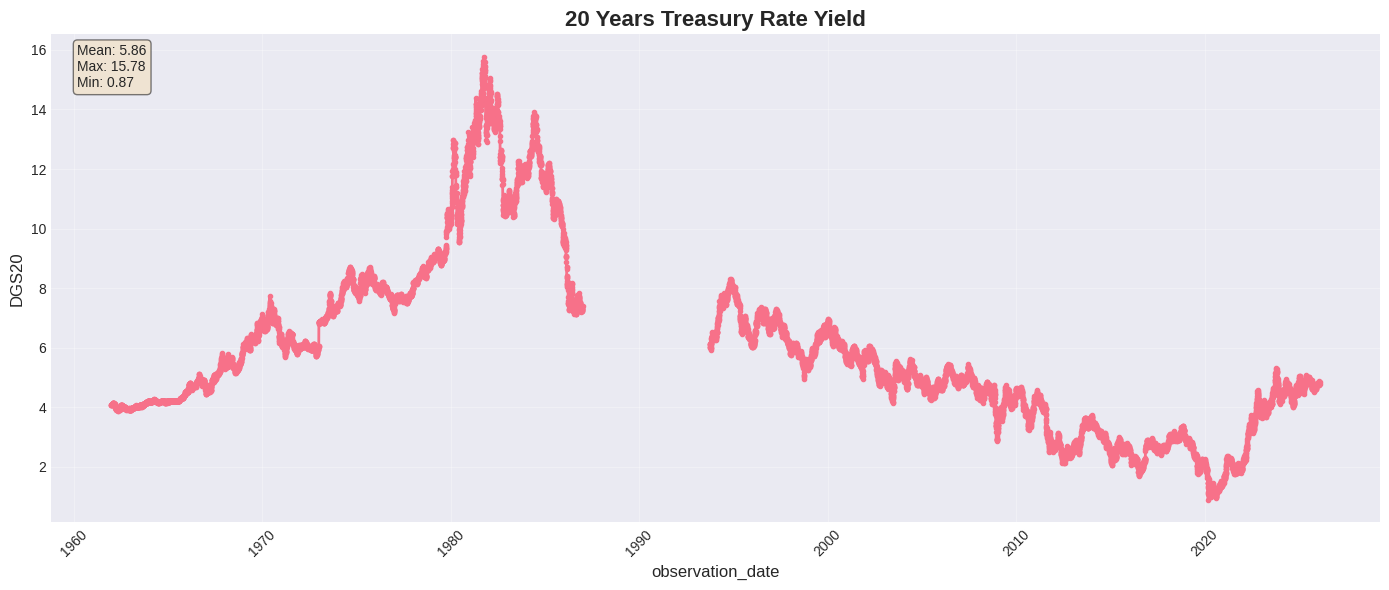

✓ Plot created for: 20_Years_Treasury_Rate_Yield.csv



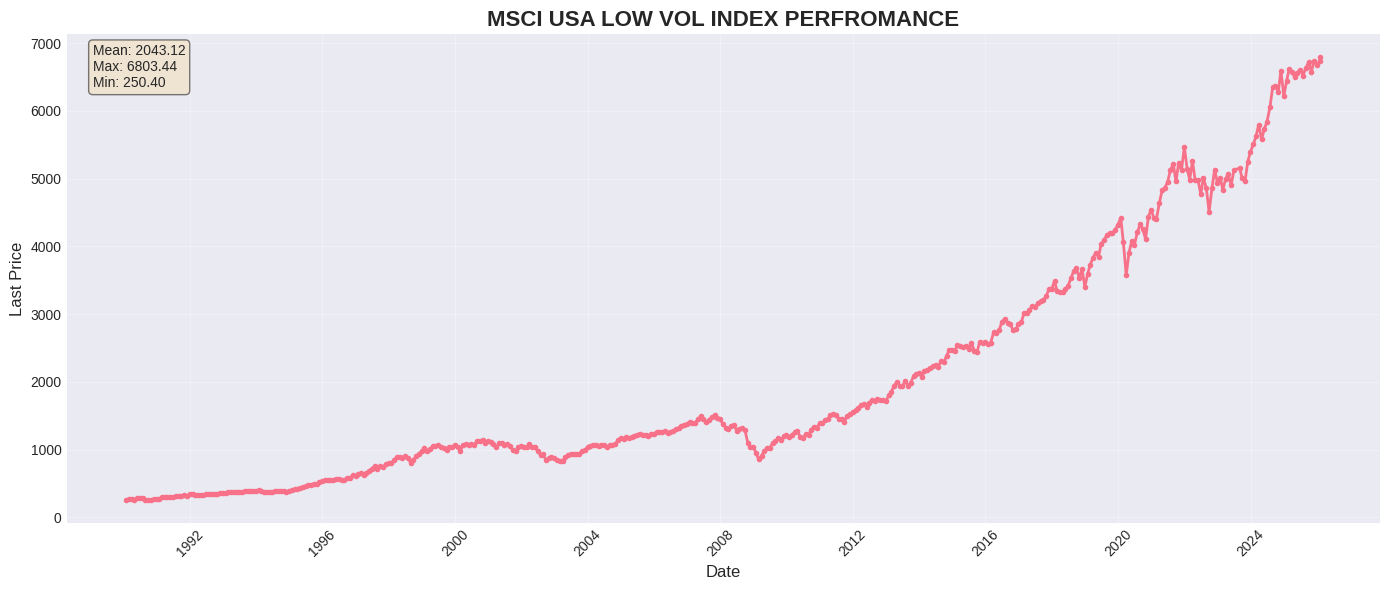

✓ Plot created for: MSCI_USA_LOW_VOL_INDEX_PERFROMANCE.csv



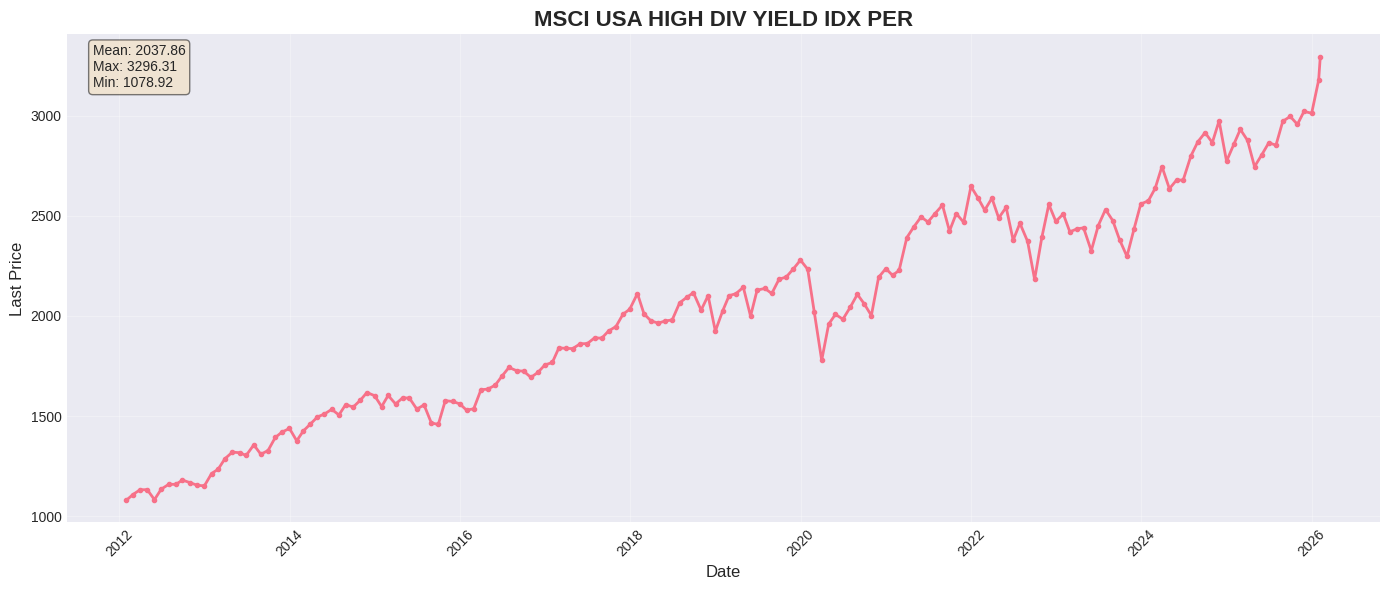

✓ Plot created for: MSCI_USA_HIGH_DIV_YIELD_IDX_PER.csv



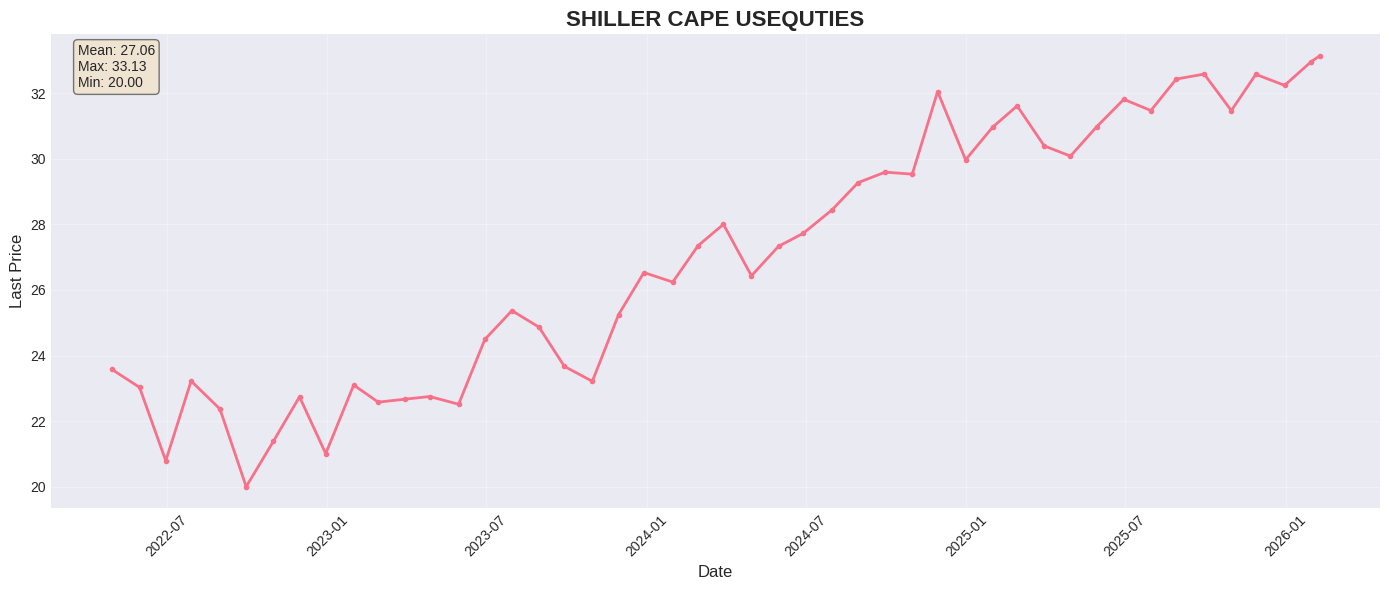

✓ Plot created for: SHILLER_CAPE_USEQUTIES.csv



/tmp/ipython-input-3211538856.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[first_col] = pd.to_datetime(df[first_col])


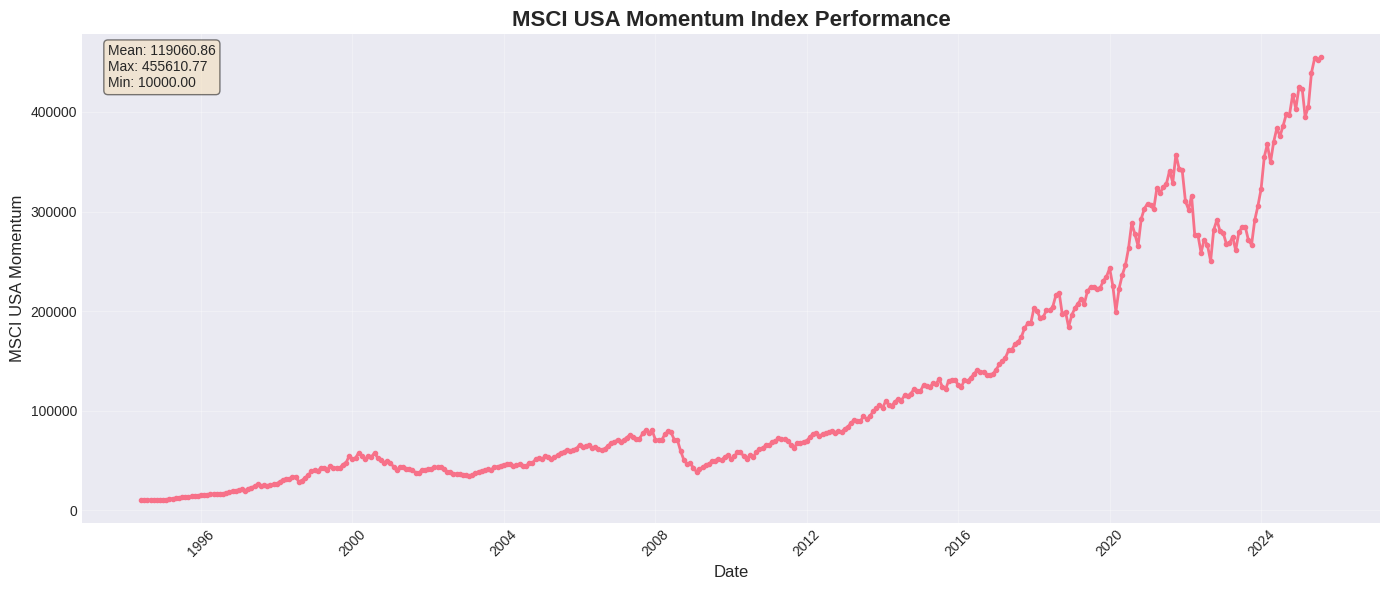

✓ Plot created for: MSCI_USA_Momentum_Index_Performance.csv



In [8]:
# Create individual line plots for each dataset
for filename, df in dataframes.items():
    df_plot = df.copy()
    df_plot, x_col, y_col = prepare_dataframe(df_plot)

    if x_col is None or y_col is None:
        print(f"⚠ Could not prepare {filename}. Skipping.")
        continue

    # Create plot
    plt.figure(figsize=(14, 6))
    plt.plot(df_plot[x_col], df_plot[y_col], linewidth=2, marker='o', markersize=3)

    # Customize plot
    title = filename.replace('.csv', '').replace('_', ' ')
    plt.title(f'{title}', fontsize=16, fontweight='bold')
    plt.xlabel(str(x_col), fontsize=12)
    plt.ylabel(str(y_col), fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add statistics to plot
    mean_val = df_plot[y_col].mean()
    max_val = df_plot[y_col].max()
    min_val = df_plot[y_col].min()

    stats_text = f'Mean: {mean_val:.2f}\nMax: {max_val:.2f}\nMin: {min_val:.2f}'
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.show()
    print(f"✓ Plot created for: {filename}\n")

/tmp/ipython-input-3211538856.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[first_col] = pd.to_datetime(df[first_col])


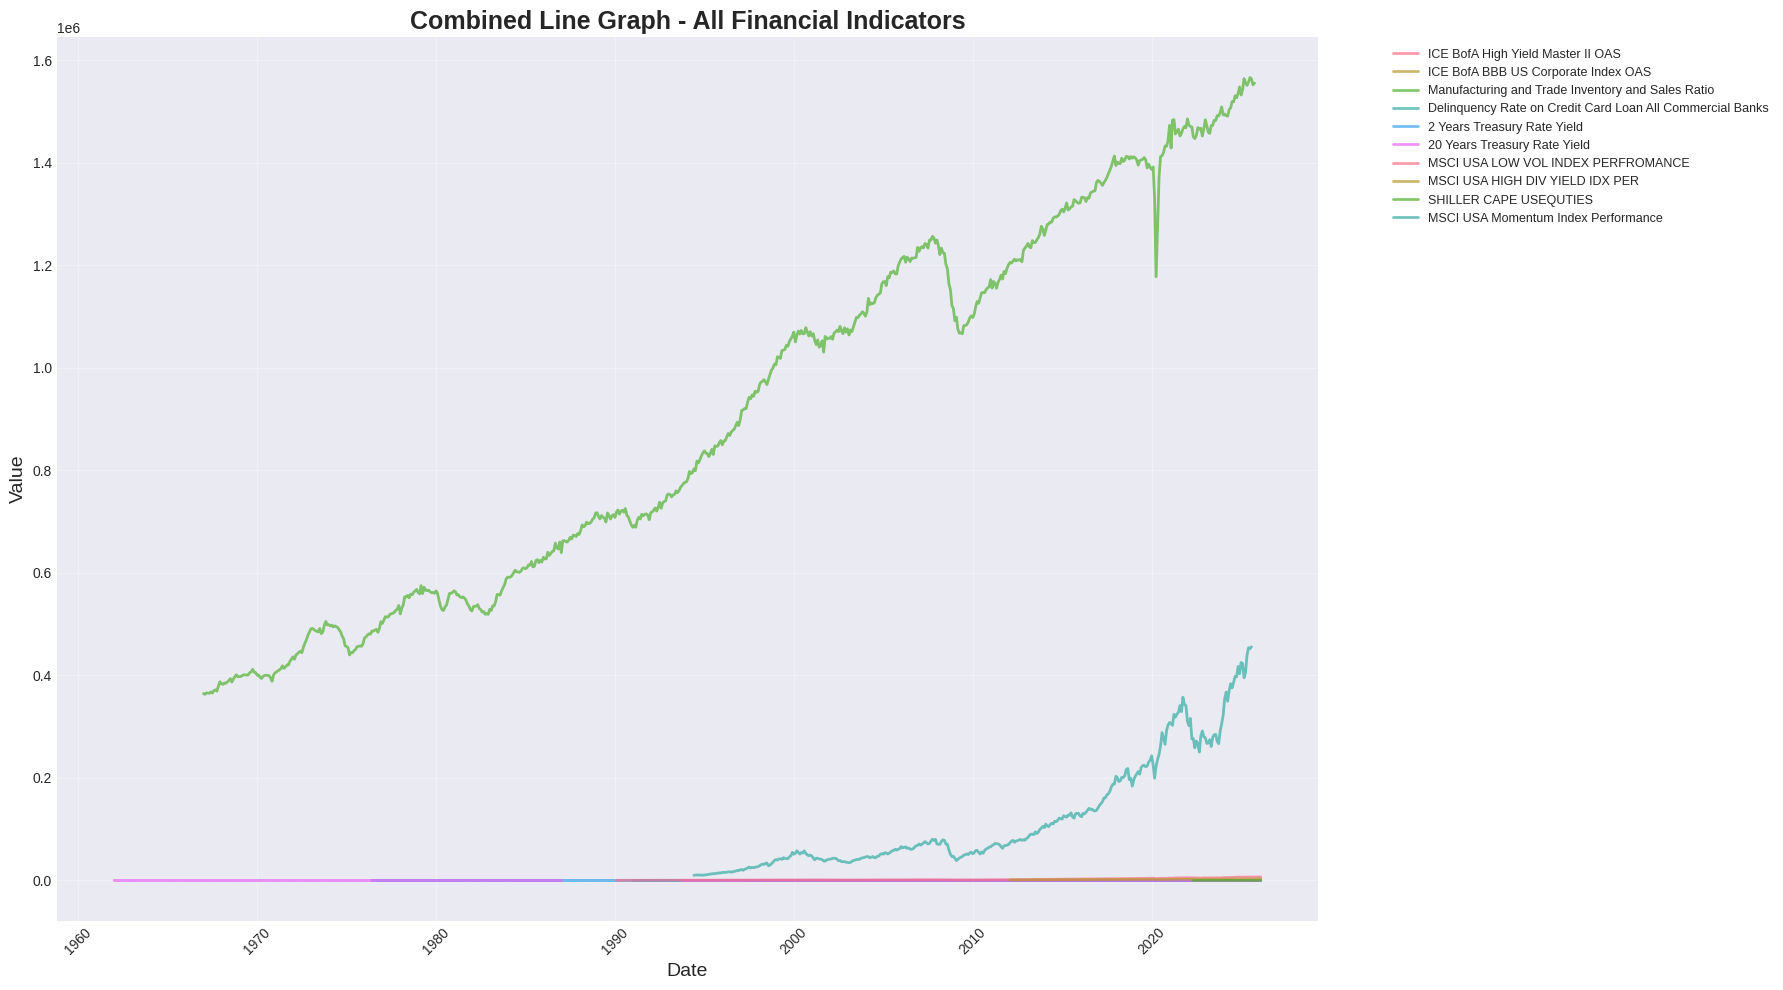

Combined plot created with 10 datasets


In [9]:
# Create combined plot with all datasets (raw values)
plt.figure(figsize=(18, 10))

for filename, df in dataframes.items():
    df_plot = df.copy()
    df_plot, x_col, y_col = prepare_dataframe(df_plot)

    if x_col is None or y_col is None:
        continue

    # Plot with label
    label = filename.replace('.csv', '').replace('_', ' ')
    plt.plot(df_plot[x_col], df_plot[y_col], linewidth=2, markersize=2,
             label=label, alpha=0.7)

# Customize combined plot
plt.title('Combined Line Graph - All Financial Indicators', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Combined plot created with {len(dataframes)} datasets")

/tmp/ipython-input-3211538856.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[first_col] = pd.to_datetime(df[first_col])


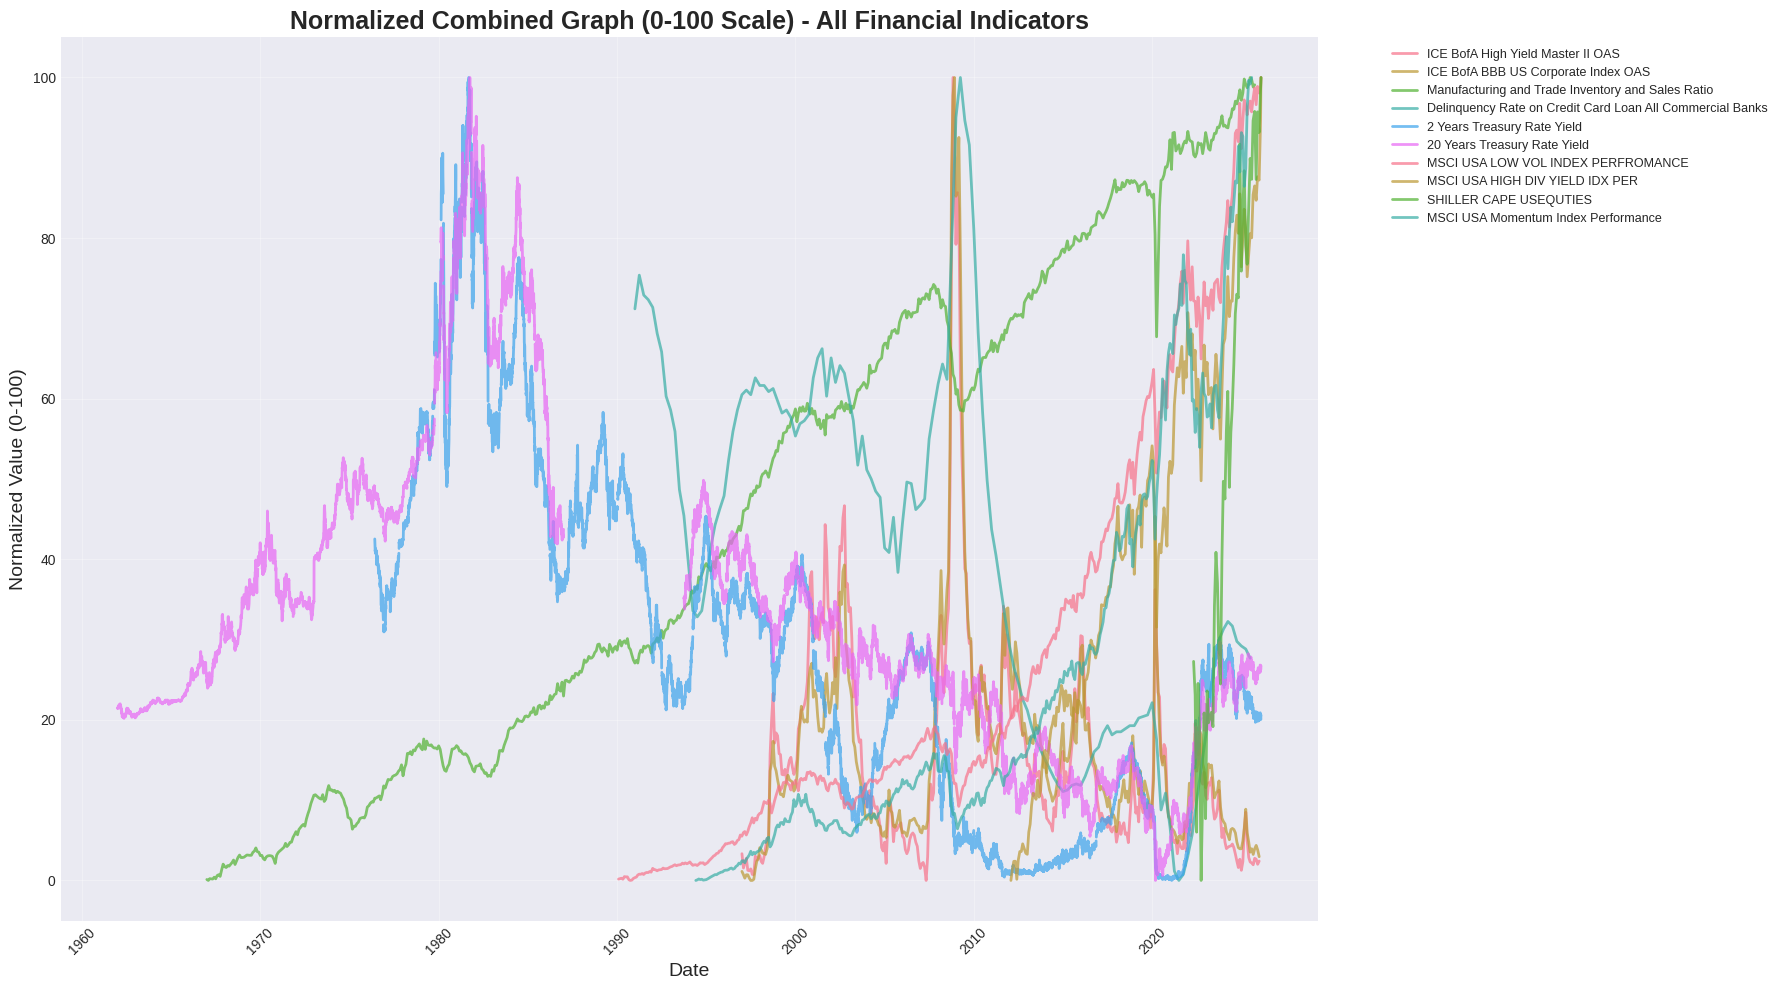

Normalized combined plot created - easier to compare trends!


In [10]:
# Create normalized combined plot (0-100 scale) - Better for comparison
plt.figure(figsize=(18, 10))

for filename, df in dataframes.items():
    df_plot = df.copy()
    df_plot, x_col, y_col = prepare_dataframe(df_plot)

    if x_col is None or y_col is None:
        continue

    # Normalize data to 0-100 scale
    y_data = df_plot[y_col]
    y_normalized = ((y_data - y_data.min()) / (y_data.max() - y_data.min())) * 100

    # Plot normalized data
    label = filename.replace('.csv', '').replace('_', ' ')
    plt.plot(df_plot[x_col], y_normalized, linewidth=2, markersize=2,
             label=label, alpha=0.7)

# Customize normalized plot
plt.title('Normalized Combined Graph (0-100 Scale) - All Financial Indicators',
          fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Value (0-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Normalized combined plot created - easier to compare trends!")

In [11]:
# Create summary statistics table
summary_data = []

for filename, df in dataframes.items():
    df_prep = df.copy()
    df_prep, x_col, y_col = prepare_dataframe(df_prep)

    if x_col is None or y_col is None:
        continue

    # Calculate statistics
    summary_data.append({
        'Indicator': filename.replace('.csv', '').replace('_', ' '),
        'Data Points': len(df_prep),
        'Mean': df_prep[y_col].mean(),
        'Median': df_prep[y_col].median(),
        'Std Dev': df_prep[y_col].std(),
        'Min': df_prep[y_col].min(),
        'Max': df_prep[y_col].max(),
        'Range': df_prep[y_col].max() - df_prep[y_col].min()
    })

# Create and display summary dataframe
summary_df = pd.DataFrame(summary_data)
print("\n" + "="*120)
print("SUMMARY STATISTICS - ALL FINANCIAL INDICATORS")
print("="*120)
print(summary_df.to_string(index=False))


SUMMARY STATISTICS - ALL FINANCIAL INDICATORS
                                                Indicator  Data Points          Mean        Median       Std Dev        Min          Max        Range
                        ICE BofA High Yield Master II OAS          350      5.230917      4.580000      2.505867      2.460 1.988000e+01 1.742000e+01
                      ICE BofA BBB US Corporate Index OAS          349      1.903954      1.670000      1.002005      0.740 7.840000e+00 7.100000e+00
        Manufacturing and Trade Inventory and Sales Ratio          706 905284.190361 869669.444500 362573.502728 362995.316 1.565953e+06 1.202958e+06
Delinquency Rate on Credit Card Loan All Commercial Banks          139      3.702590      3.860000      1.188801      1.530 6.770000e+00 5.240000e+00
                              2 Years Treasury Rate Yield        12963      4.964332      4.660000      3.673248      0.090 1.695000e+01 1.686000e+01
                             20 Years Treasury Rate Y

/tmp/ipython-input-3211538856.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[first_col] = pd.to_datetime(df[first_col])


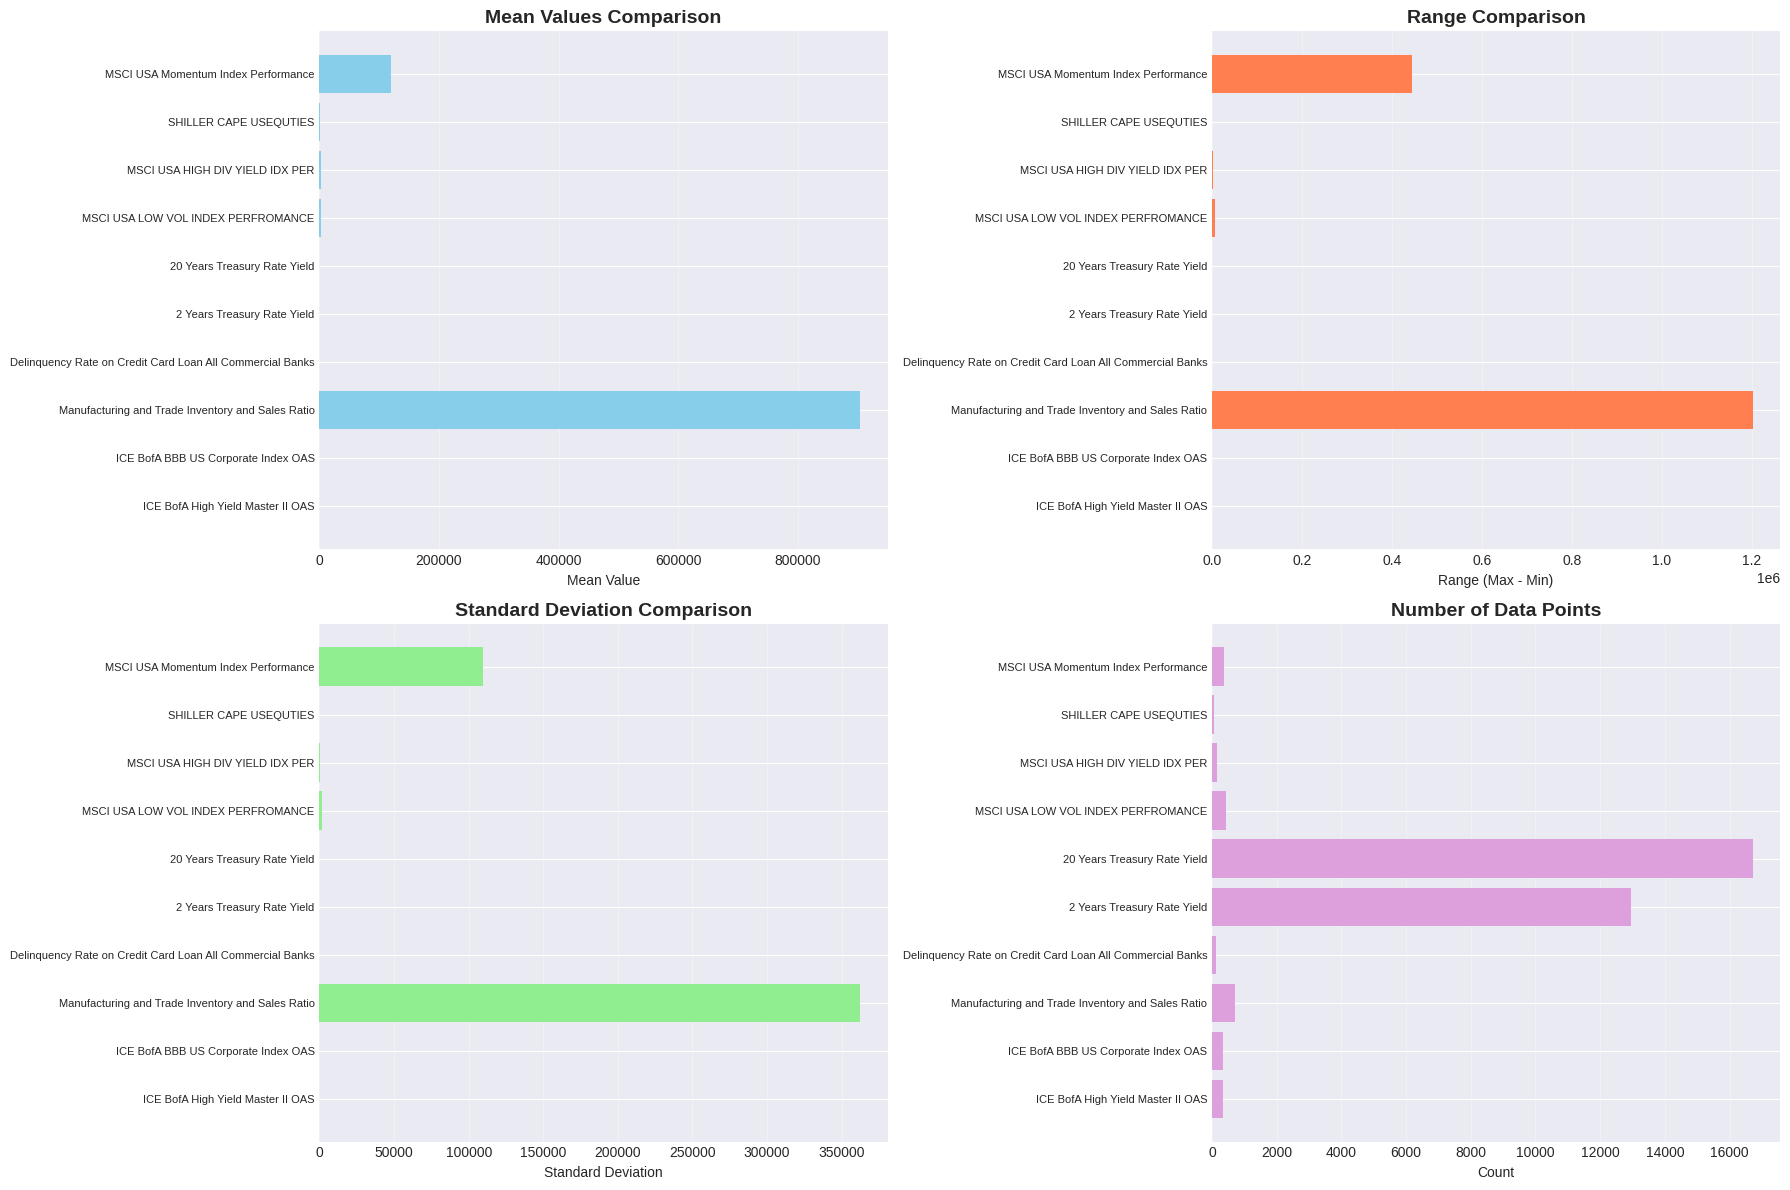

In [12]:
# Visualize summary statistics
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Mean comparison
axes[0, 0].barh(summary_df['Indicator'], summary_df['Mean'], color='skyblue')
axes[0, 0].set_title('Mean Values Comparison', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Mean Value')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].tick_params(axis='y', labelsize=8)

# Range comparison
axes[0, 1].barh(summary_df['Indicator'], summary_df['Range'], color='coral')
axes[0, 1].set_title('Range Comparison', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Range (Max - Min)')
axes[0, 1].grid(axis='x', alpha=0.3)
axes[0, 1].tick_params(axis='y', labelsize=8)

# Standard deviation comparison
axes[1, 0].barh(summary_df['Indicator'], summary_df['Std Dev'], color='lightgreen')
axes[1, 0].set_title('Standard Deviation Comparison', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Standard Deviation')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].tick_params(axis='y', labelsize=8)

# Data points count
axes[1, 1].barh(summary_df['Indicator'], summary_df['Data Points'], color='plum')
axes[1, 1].set_title('Number of Data Points', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Count')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

In [13]:
# Correlation analysis (if dates overlap)
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)
print("\nNote: This shows how different indicators move together")
print("(Only possible where date ranges overlap)\n")

# This cell shows which indicators tend to move together
# Useful for understanding relationships between financial metrics

CORRELATION ANALYSIS

Note: This shows how different indicators move together
(Only possible where date ranges overlap)

